#### Import Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading Rating Data

In [2]:
df = pd.read_csv('input_data\\rating.csv')
df.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


#### Number of unique Users

In [67]:
df['userId'].nunique()

138493


#### Number of unique Movies

In [68]:
df['movieId'].nunique()

26744

#### Counting User rating occurence

In [3]:
df['user_counts'] = df.groupby('userId')['userId'].transform('count')
df.head()

,userId,movieId,rating,timestamp,user_counts
0,1,2,3.5,2005-04-02 23:53:47,175
1,1,29,3.5,2005-04-02 23:31:16,175
2,1,32,3.5,2005-04-02 23:33:39,175
3,1,47,3.5,2005-04-02 23:32:07,175
4,1,50,3.5,2005-04-02 23:29:40,175


#### Counting Movie rating occurence

In [4]:
df['movie_counts'] = df.groupby('movieId')['movieId'].transform('count')
df.head()

,userId,movieId,rating,timestamp,user_counts,movie_counts
0,1,2,3.5,2005-04-02 23:53:47,175,22243
1,1,29,3.5,2005-04-02 23:31:16,175,8520
2,1,32,3.5,2005-04-02 23:33:39,175,44980
3,1,47,3.5,2005-04-02 23:32:07,175,43249
4,1,50,3.5,2005-04-02 23:29:40,175,47006


#### Calculating average rating per User

In [5]:
df['avg_user_rating'] = df.groupby('userId')['rating'].transform('mean')
df.head()

,userId,movieId,rating,timestamp,user_counts,movie_counts,avg_user_rating
0,1,2,3.5,2005-04-02 23:53:47,175,22243,3.742857
1,1,29,3.5,2005-04-02 23:31:16,175,8520,3.742857
2,1,32,3.5,2005-04-02 23:33:39,175,44980,3.742857
3,1,47,3.5,2005-04-02 23:32:07,175,43249,3.742857
4,1,50,3.5,2005-04-02 23:29:40,175,47006,3.742857


#### Calculating average rating per Movie

In [6]:
df['avg_movie_rating'] = df.groupby('movieId')['rating'].transform('mean')
df.head()

,userId,movieId,rating,timestamp,user_counts,movie_counts,avg_user_rating,avg_movie_rating
0,1,2,3.5,2005-04-02 23:53:47,175,22243,3.742857,3.211977
1,1,29,3.5,2005-04-02 23:31:16,175,8520,3.742857,3.952230
2,1,32,3.5,2005-04-02 23:33:39,175,44980,3.742857,3.898055
3,1,47,3.5,2005-04-02 23:32:07,175,43249,3.742857,4.053493
4,1,50,3.5,2005-04-02 23:29:40,175,47006,3.742857,4.334372


#### Rating Avg/Counts Visualization per User

<Axes: xlabel='avg_user_rating', ylabel='user_counts'>

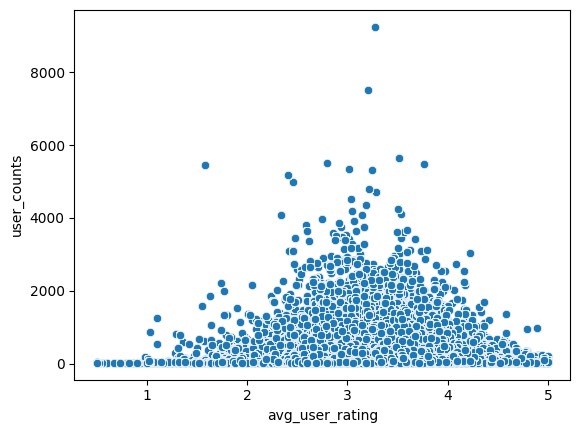

In [7]:
sns.scatterplot(x='avg_user_rating', y='user_counts', data=df)

#### Rating Avg/Counts Visualization per Movie

<Axes: xlabel='avg_movie_rating', ylabel='movie_counts'>

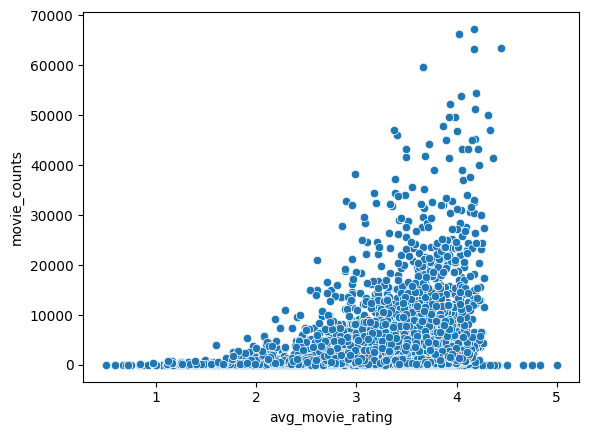

In [8]:
sns.scatterplot(x='avg_movie_rating', y='movie_counts', data=df)

#### Global average rating

In [9]:
avg_rating = df['rating'].mean()
print(avg_rating)

3.5255285642993797


#### Distribution of Ratings

<Axes: xlabel='rating', ylabel='count'>

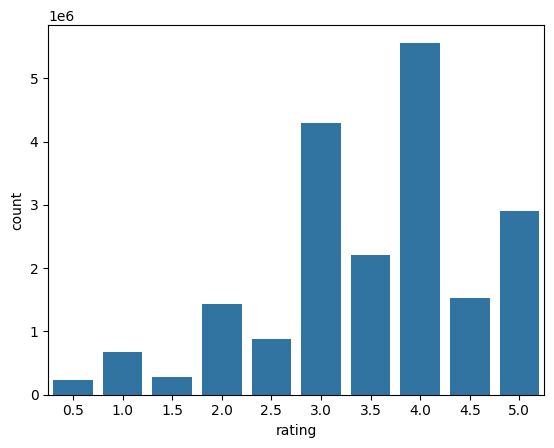

In [87]:
sns.countplot(x='rating',data=df)

In [10]:
print(df['userId'].nunique())
print(df['userId'].value_counts(ascending=False))

138493
userId
118205    9254
8405      7515
82418     5646
121535    5520
125794    5491
          ... 
89305       20
110463      20
96990       20
134747      20
6526        20
Name: count, Length: 138493, dtype: int64


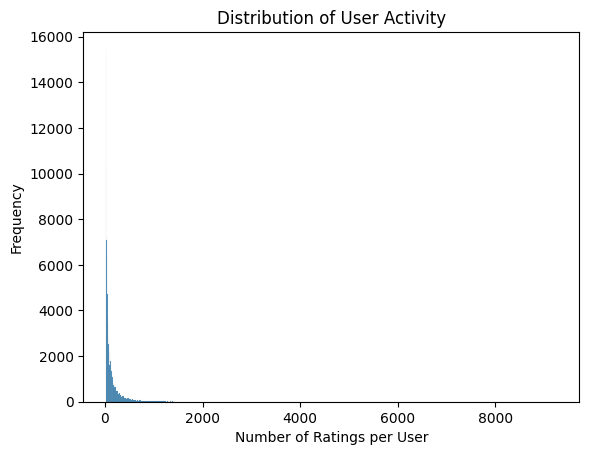

In [55]:
# Étape 1 : Compter le nombre d'occurrences de chaque userId
user_counts = df['userId'].value_counts()

# Étape 2 : Créer un DataFrame avec ces occurrences
df_plot = pd.DataFrame({'userId': user_counts.index, 'counts': user_counts.values})

# Étape 3 : Tracer la distribution des occurrences
sns.histplot(data=df_plot, x='counts')

# Option 1: Limiter l'axe des x
#plt.xlim(0, 2000)  # Ajustez les limites en fonction de ce qui vous semble pertinent

# Optionnel : ajouter des titres et labels
plt.title('Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.show()

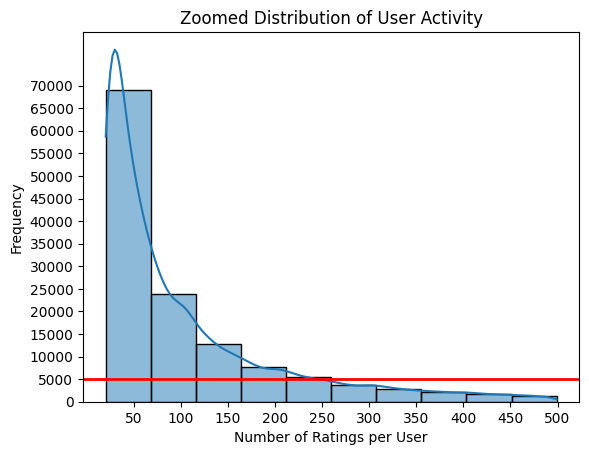

In [51]:
df_plot_filtered = df_plot[df_plot['counts'] < 500]
# Création du histogramme
sns.histplot(data=df_plot_filtered, x='counts', bins=10, kde=True)
# Ajouter une barre horizontale rouge à ordonnée 5000
plt.axhline(y=5000, color='red', linestyle='-', linewidth=2)
# Définir les graduations sur l'axe des x
plt.xticks(ticks=range(50, 501, 50))
plt.yticks(ticks=range(0, 70001,5000))

plt.title('Zoomed Distribution of User Activity')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
# Afficher le graphique
plt.show()


In [56]:
df_plot.head()

,userId,counts
0,118205,9254
1,8405,7515
2,82418,5646
3,121535,5520
4,125794,5491


In [57]:
# Étape 2 : Calculer les quantiles et autres statistiques
quantiles = user_counts.quantile([0, 0.25, 0.5, 0.85, 1])

print("85% of Ratings :", round(len(df)*0.85))
print("15% of Ratings :", round(len(df)*0.15))

print("Number of ratings per quantiles:")
print(quantiles)

85% of Ratings : 17000224
15% of Ratings : 3000039
Number of ratings per quantiles:
0.00      20.0
0.25      35.0
0.50      68.0
0.85     246.0
1.00    9254.0
Name: count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

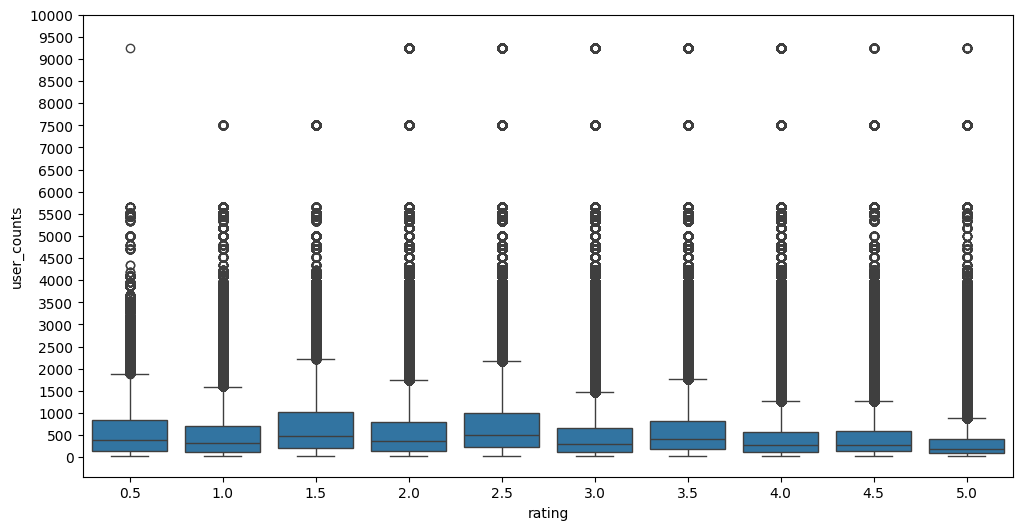

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(x='rating',y='user_counts',data=df)
plt.yticks(ticks=range(0, 10001,500))
plt.show

<Axes: xlabel='rating', ylabel='movie_counts'>

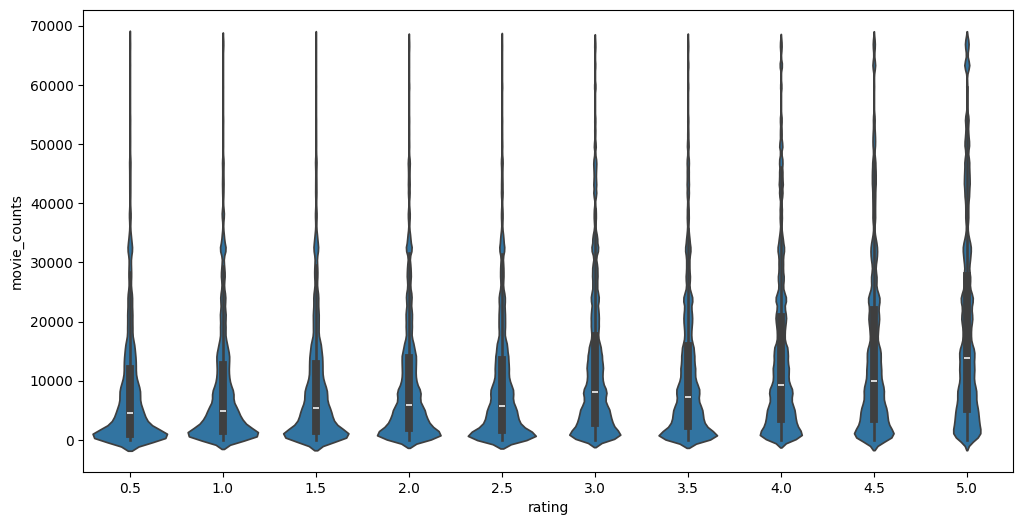

In [78]:
plt.figure(figsize=(12,6))
sns.violinplot(x='rating',y='movie_counts',data=df)

In [85]:


# Étape 1 : Compter le nombre d'occurrences de chaque userId
user_counts = df['userId'].value_counts()

# Étape 2 : Calculer le nombre total de ratings
total_ratings = user_counts.sum()

# Étape 3 : Calculer 15% du nombre total de ratings
target_ratings = total_ratings * 0.15

# Étape 4 : Trier les userId par nombre de ratings en ordre décroissant
user_counts_sorted = user_counts.sort_values(ascending=False)

# Étape 5 : Calculer le nombre cumulatif de ratings
cumulative_ratings = user_counts_sorted.cumsum()

# Étape 6 : Trouver le nombre minimum de users nécessaires pour atteindre 15% des ratings
users_needed = cumulative_ratings[cumulative_ratings <= target_ratings].count()

# Afficher le résultat
print(f"It takes only the {users_needed} most active rating users to account for 15% of all ratings.")
print("They count only for",round(users_needed/df['userId'].nunique()*100, 1),f"% of all {df['userId'].nunique()} users.")


It takes only the 2087 most active rating users to account for 15% of all ratings.
They count only for 1.5 % of all 138493 users.


In [64]:
# Étape 7 : Créer un DataFrame avec ces userIds
df_filtered_15 = df[df['userId'].isin(users_needed)]

TypeError: only list-like objects are allowed to be passed to isin(), you passed a `int64`

#### Transforming timestamp into a rating youth rate

This means the youngest rating will have the highest score = 1, and the oldest rating will have the lowest score = 0

In [76]:
# Convert 'timestamp'columns into datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Calculate age in years
current_date = pd.Timestamp.now()
df['age'] = round((current_date - df['timestamp']).dt.days / 365.25, 0)

# Creating the rating youth rate
df['rating_youth_rate'] = 1 - (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())

# Drop 'age' and 'timestamp' column 
df = df.drop(columns=['age', 'timestamp'])
df.head(3)

,userId,movieId,rating,user_counts,movie_counts,avg_user_rating,avg_movie_rating,rating_youth_rate
0,1,2,3.5,175,22243,3.742857,3.211977,0.52381
1,1,29,3.5,175,8520,3.742857,3.952230,0.52381
2,1,32,3.5,175,44980,3.742857,3.898055,0.52381


In [6]:
df['rating'] = df['rating'].astype('float32')
df['rating_youth_rate'] = df['rating_youth_rate'].astype('float32')

In [7]:
df_movie = pd.read_csv('input_data\\movie.csv')

In [8]:
df_movie.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


##### Splitting genres and Extracting title and year data for a easier use later on

In [9]:
# Utiliser str.extract pour séparer le titre et l'année
df_movie[['title', 'year']] = df_movie['title'].str.extract(r'^(.*)\s\((\d{4})\)$')

##### Splitting genres and Extracting title and year data for a easier use later on
# One-hot encoding des genres
df_genres_encoded = df_movie['genres'].str.get_dummies(sep='|')

# Concatenation avec le DataFrame original
df_movie = pd.concat([df_movie, df_genres_encoded], axis=1)
df_movie = df_movie.drop(['genres'], axis=1)
df_movie.head(3)

,movieId,title,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Dropping a few NaN in titles, and transforming date in age to later create youth_rate for movies

In [10]:
# Drop les lignes sans titles ni years (55 en tout)
df_movie = df_movie.dropna(subset=['title'])

# Convertir la colonne 'year' en entier
df_movie['year'] = df_movie['year'].astype(int)

# Creation de la colonne age_movie
df_movie['age'] = 2024 - df_movie['year']

# Normaliser l'âge pour obtenir le taux de jeunesse (0 à 1)
# Ici, l'âge le plus vieux devient 0 et l'âge le plus jeune devient 1
df_movie['movie_youth_rate'] = 1 - (df_movie['age'] - df_movie['age'].min()) / (df_movie['age'].max() - df_movie['age'].min())

df_movie['movie_youth_rate'] = df_movie['movie_youth_rate'].astype('float32')

# Droper la colonne 'age'
df_movie = df_movie.drop(columns=['age', 'year', '(no genres listed)'], axis=1)

df_movie.head(5)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate
0,1,Toy Story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.83871
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.83871
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.83871
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0.83871
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.83871


In [11]:
'''# Importing necessary libraries
import nltk
from nltk.data import find
import gensim

# Downloading required NLTK resources
nltk.download('punkt')  # Downloading tokenizers for NLTK
nltk.download('stopwords')
nltk.download('word2vec_sample')  # Downloading the word2vec sample model

# Finding the path of the pre-trained word2vec model
word2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))

# Loading the pre-trained word2vec model using Gensim
model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)'''

"# Importing necessary libraries\nimport nltk\nfrom nltk.data import find\nimport gensim\n\n# Downloading required NLTK resources\nnltk.download('punkt')  # Downloading tokenizers for NLTK\nnltk.download('stopwords')\nnltk.download('word2vec_sample')  # Downloading the word2vec sample model\n\n# Finding the path of the pre-trained word2vec model\nword2vec_sample = str(find('models/word2vec_sample/pruned.word2vec.txt'))\n\n# Loading the pre-trained word2vec model using Gensim\nmodel = gensim.models.KeyedVectors.load_word2vec_format(word2vec_sample, binary=False)"

In [12]:
'''from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assure-toi d'avoir téléchargé les stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Charger les stopwords anglais
stop_words = set(stopwords.words('english'))

# Fonction pour supprimer les stopwords d'un texte
def remove_stopwords(text):
    # Tokenisation du texte
    words = word_tokenize(text.lower())
    # Filtrage des stopwords
    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]
    # Rejoindre les mots filtrés en une seule chaîne
    return ' '.join(filtered_words)

# Appliquer la fonction à la colonne 'title'
df_movie['title'] = df_movie['title'].apply(remove_stopwords)'''


"from nltk.corpus import stopwords\nfrom nltk.tokenize import word_tokenize\n\n# Assure-toi d'avoir téléchargé les stopwords\nnltk.download('stopwords')\nnltk.download('punkt')\n\n# Charger les stopwords anglais\nstop_words = set(stopwords.words('english'))\n\n# Fonction pour supprimer les stopwords d'un texte\ndef remove_stopwords(text):\n    # Tokenisation du texte\n    words = word_tokenize(text.lower())\n    # Filtrage des stopwords\n    filtered_words = [word for word in words if word not in stop_words and word.isalpha()]\n    # Rejoindre les mots filtrés en une seule chaîne\n    return ' '.join(filtered_words)\n\n# Appliquer la fonction à la colonne 'title'\ndf_movie['title'] = df_movie['title'].apply(remove_stopwords)"

In [13]:
'''# Fonction pour vectoriser les mots d'un title
def vectorize_title(title, model):
    vectors = []
    for word in title.split():
        if word in model:
            vectors.append(model[word])
        else:
            return np.zeros(model.vector_size)  # Retourne un vecteur nul si un mot n'est pas reconnu
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)


# Appliquer la fonction de vectorisation
df_movie['title_vector'] = df_movie['title'].apply(lambda x: vectorize_title(x, model))


df_movie.head(3)'''

"# Fonction pour vectoriser les mots d'un title\ndef vectorize_title(title, model):\n    vectors = []\n    for word in title.split():\n        if word in model:\n            vectors.append(model[word])\n        else:\n            return np.zeros(model.vector_size)  # Retourne un vecteur nul si un mot n'est pas reconnu\n    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)\n\n\n# Appliquer la fonction de vectorisation\ndf_movie['title_vector'] = df_movie['title'].apply(lambda x: vectorize_title(x, model))\n\n\ndf_movie.head(3)"

In [15]:
import re

def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation et les symboles
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text
df_movie['title'] = df_movie['title'].apply(clean_text)

In [16]:
df_movie.head

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate
0,1,toy story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.838710
1,2,jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.838710
2,3,grumpier old men,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.838710
3,4,waiting to exhale,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0.838710
4,5,father of the bride part ii,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.838710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,kein bund frs leben,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.935484
27274,131256,feuer eis dosenbier,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.895161
27275,131258,the pirates,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.991935
27276,131260,rentun ruusu,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.887097


In [27]:
df_imdb = pd.read_csv('output_data\imdb_encoded_3.csv')

In [28]:
df_imdb = df_imdb[['movieId', 'popularity_rate']]

In [29]:
df_movie = pd.merge(df_movie, df_imdb, on='movieId', how='left')

df_movie.head(5)

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movie_youth_rate,popularity_rate
0,1,Toy Story,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0.83871,0.369477
1,2,Jumanji,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.83871,0.130576
2,3,Grumpier Old Men,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0.83871,0.010230
3,4,Waiting to Exhale,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0.83871,0.004228
4,5,Father of the Bride Part II,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.83871,0.014380


In [ ]:
print(df_movie.columns)

Index(['movieId', 'title', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western', 'movie_youth_rate', 'popularity_rate'],
      dtype='object')


In [ ]:
ordered_columns = ['movieId', 'title', 'movie_youth_rate', 'popularity_rate', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western']

df_movie = df_movie[ordered_columns]

df_movie.head(2)


,movieId,title,movie_youth_rate,popularity_rate,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,toy story,0.83871,0.369477,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,jumanji,0.83871,0.130576,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_combined = pd.merge(df, df_movie, on='movieId', how='left')

df_combined.head(5)

,userId,movieId,rating,rating_youth_rate,title,movie_youth_rate,popularity_rate,Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,2,3.5,0.52381,jumanji,0.83871,0.130576,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,29,3.5,0.52381,city lost children cité des enfants perdus la,0.83871,0.024644,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,32,3.5,0.52381,twelve monkeys monkeys,0.83871,0.222506,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,1,47,3.5,0.52381,seven,0.83871,0.623154,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,1,50,3.5,0.52381,usual suspects,0.83871,0.394856,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [20]:
df_combined['rating'] = df_combined['rating'].astype('float32')
df_combined['rating_youth_rate'] = df_combined['rating_youth_rate'].astype('float32')
df_combined['movie_youth_rate'] = df_combined['movie_youth_rate'].astype('float32')
df_combined['popularity_rate'] = df_combined['popularity_rate'].astype('float32')


In [21]:
df_combined.shape

(20000263, 26)